In [1]:
from plotly.subplots import make_subplots
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.io as pio

In [2]:
pio.renderers.default = "svg"

# Python Dynamic Array Performance

In [3]:
# Load the data
df = pd.read_csv('perf_log.csv')

In [4]:
df.goal.unique()

array(['intArrayCosts', 'stringCreateCosts', 'stringMatch'], dtype=object)

In [5]:
# Create agg for charts
agg_df = df.groupby(['goal','function','arg'])['time_elapsed','max_memory'].mean().reset_index()

/var/folders/3y/n2rzdkp138zg1knr7dh9nmsc0000gn/T/ipykernel_49979/2471224687.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



### String Matching
*Lessons learned*
* String appending is terrible for performance. Remarkably it uses the least memory though, still don't use it
* Comprehension better than array_append (~20%) faster

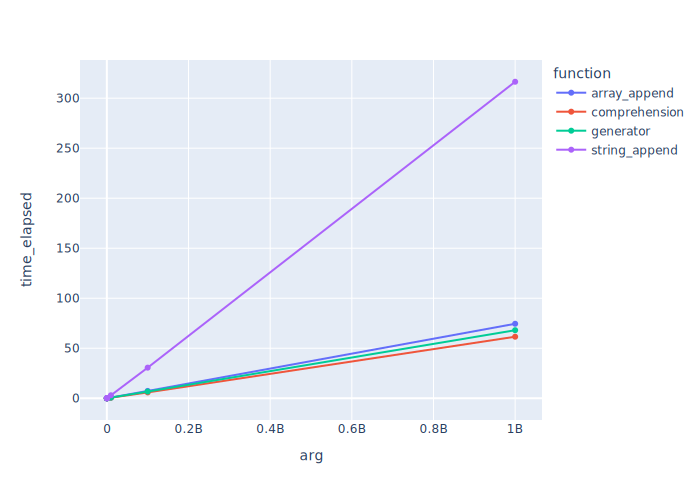

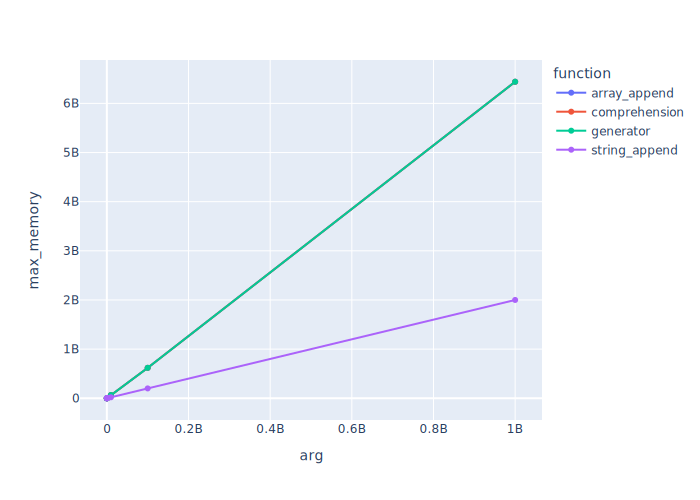

In [6]:
fig1_time = px.line(agg_df[(agg_df['goal'] == 'stringMatch') & (agg_df['function'] != 'read_file')], x="arg", y="time_elapsed", color='function')
for i in range(len(fig1_time.data)):
    fig1_time.data[i].update(mode='markers+lines')
fig1_time.show(renderer='svg')

fig1_mem = px.line(agg_df[(agg_df['goal'] == 'stringMatch') & (agg_df['function'] != 'read_file')], x="arg", y="max_memory", color='function')
for i in range(len(fig1_mem.data)):
    fig1_mem.data[i].update(mode='markers+lines')
fig1_mem.show()

### String Create Costs
*Lessons Learned*
* Python built-ins (in this case random_choicses) work very well!
* String append, once again is extremely slow

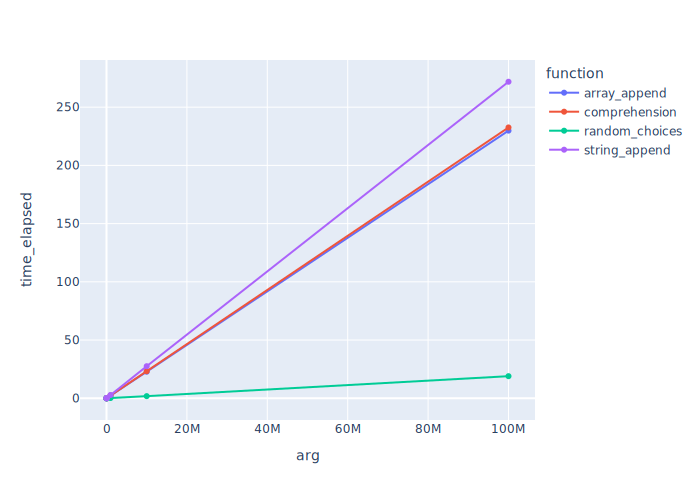

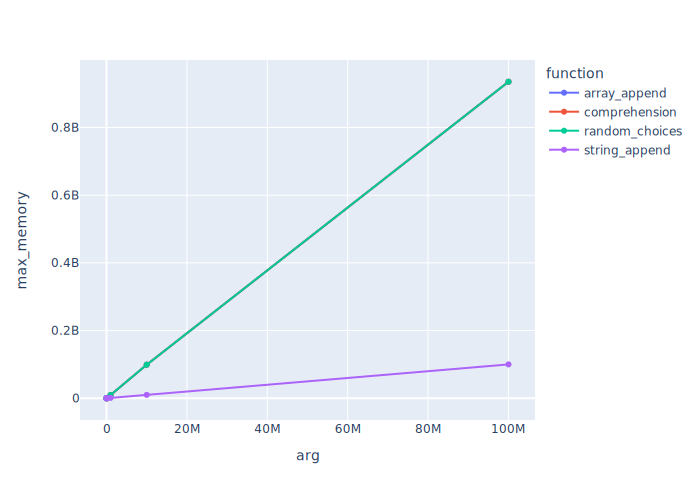

In [7]:
fig2_time = px.line(agg_df[(agg_df['goal'] == 'stringCreateCosts') & (agg_df['function'] != 'read_file')], x="arg", y="time_elapsed", color='function')
for i in range(len(fig2_time.data)):
    fig2_time.data[i].update(mode='markers+lines')
fig2_time.show()

fig2_mem = px.line(agg_df[(agg_df['goal'] == 'stringCreateCosts') & (agg_df['function'] != 'read_file')], x="arg", y="max_memory", color='function')
for i in range(len(fig2_mem.data)):
    fig2_mem.data[i].update(mode='markers+lines')
fig2_mem.show()

### Int Array Costs
*Lessons Learned*
* Overall, python optimizes these pretty well
* Zero array is best, but it's all pretty even

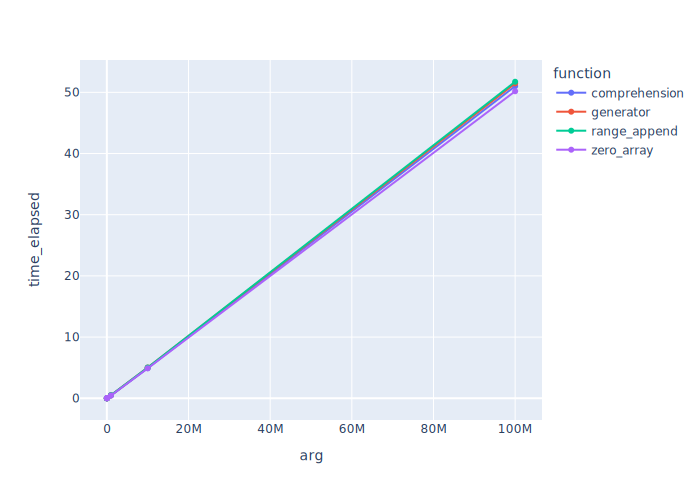

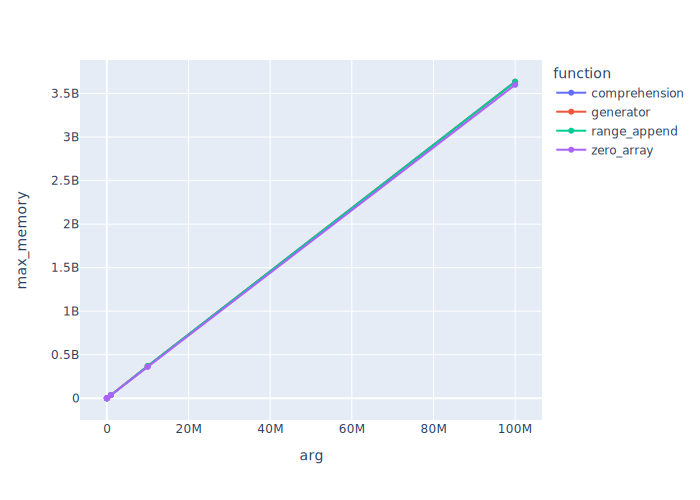

In [8]:
fig3_time = px.line(agg_df[(agg_df['goal'] == 'intArrayCosts') & (agg_df['function'] != 'read_file')], x="arg", y="time_elapsed", color='function')
for i in range(len(fig3_time.data)):
    fig3_time.data[i].update(mode='markers+lines')
fig3_time.show()

fig3_mem = px.line(agg_df[(agg_df['goal'] == 'intArrayCosts') & (agg_df['function'] != 'read_file')], x="arg", y="max_memory", color='function')
for i in range(len(fig3_mem.data)):
    fig3_mem.data[i].update(mode='markers+lines')
fig3_mem.show()